In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import log_loss
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import math
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test = pd.read_csv(r"E:\ML Internship\Credit Card Fraud detection\fraudTest.csv")
print("Total no.of points = {}".format(df_test.shape[0]))
df_test.head(5)

Total no.of points = 555719


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df_test = df_test.drop(["Unnamed: 0"],axis=1)

In [4]:
df_test_feat = df_test[['cc_num','category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop','unix_time', 'merch_lat', 'merch_long', 'is_fraud']]
#df_test_feat.head(5)

In [5]:
df_test_processed = pd.get_dummies(data=df_test_feat,columns=['category'])
#df_test_processed.head(5)

In [6]:
df_test_processed.replace({False:0, True:1}, inplace=True)
df_test_processed.replace(['F','M'],[0,1], inplace=True)
df_test_processed.head(3)

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2291163933867244,2.86,1,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,...,0,0,0,0,0,0,1,0,0,0
1,3573030041201292,29.84,0,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,...,0,0,0,0,0,0,1,0,0,0
2,3598215285024754,41.28,0,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,...,0,1,0,0,0,0,0,0,0,0


In [7]:
df_test_processed = df_test_processed.astype(float)

In [8]:
features_test = df_test_processed.drop(columns=["is_fraud"],axis=1)
Y_test = df_test_processed["is_fraud"]

In [9]:
df_train = pd.read_csv(r"E:\ML Internship\Credit Card Fraud detection\fraudTrain.csv")
print("Total no.of points = {}".format(df_train.shape[0]))
df_train.head(5)

Total no.of points = 1296675


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df_train = df_train.drop(["Unnamed: 0"],axis=1)

# Data visualization

<AxesSubplot: xlabel='gender', ylabel='count'>

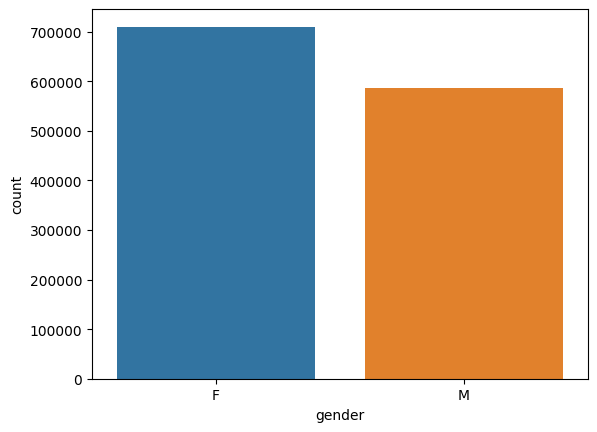

In [11]:
sns.countplot(x='gender',data=df_train)

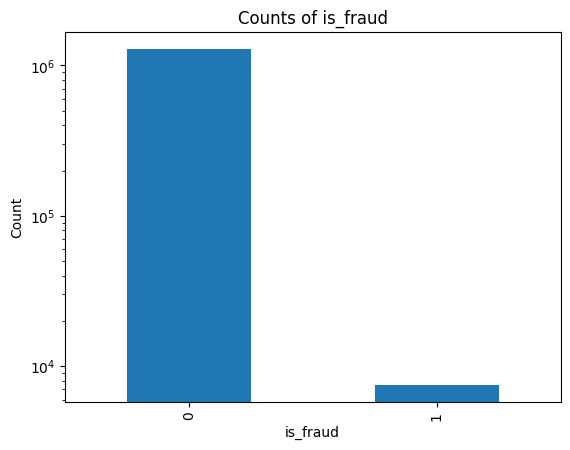

In [12]:
fraud_counts = df_train['is_fraud'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Counts of is_fraud')
plt.show()

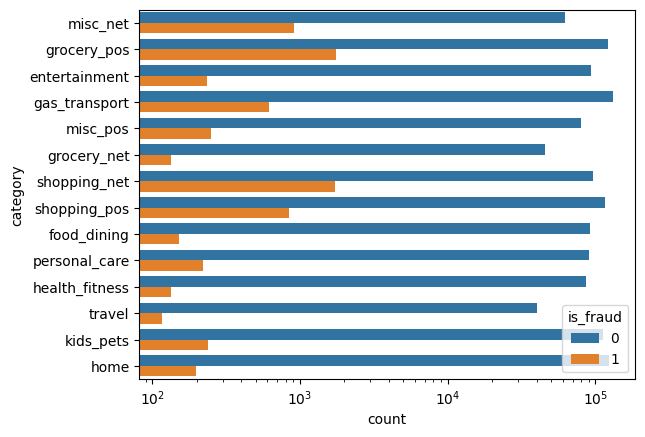

In [13]:
sns.countplot(y='category', hue="is_fraud", data=df_train)
plt.xscale("log")
plt.show()

In [14]:
df_train["category"].unique().shape

(14,)

In [15]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
df_train_feat = df_train[['cc_num','category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop','unix_time', 'merch_lat', 'merch_long', 'is_fraud']]
df_train_feat.head(5)

,cc_num,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [18]:
df_train_processed = pd.get_dummies(data=df_train_feat,columns=['category'])
df_train_processed.head(5)

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,...,False,False,False,False,False,True,False,False,False,False


In [19]:
df_train_processed.replace({False:0, True:1}, inplace=True)

In [20]:
df_train_processed.replace(['F','M'],[0,1], inplace=True)

In [21]:
df_train_processed.head(5)

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,...,0,0,0,0,0,1,0,0,0,0


In [22]:
df_train_processed = df_train_processed.astype(float)

In [23]:
features = df_train_processed.drop(columns=["is_fraud"],axis=1)

In [24]:
Y = df_train_processed["is_fraud"]

## Logistic Regression

In [25]:
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(features,Y)
LR

LogisticRegression(C=0.01, solver='newton-cg')

In [26]:
predictions_lr = LR.predict(features_test)
predictions_lr[0:5]

array([0., 0., 0., 0., 0.])

In [27]:
predict_proba_lr = LR.predict_proba(features_test)
predict_proba_lr[0:5]

array([[0.98568461, 0.01431539],
       [0.98568873, 0.01431127],
       [0.98568881, 0.01431119],
       [0.98568879, 0.01431121],
       [0.98568859, 0.01431141]])

In [28]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test, predictions_lr)
LR_JaccardIndex = jaccard_score(Y_test, predictions_lr, pos_label=1)
LR_F1_Score = f1_score(Y_test, predictions_lr, average='weighted')
LR_Log_Loss = log_loss(Y_test, predict_proba_lr)

LR_report = {'Accuracy_Score': LR_Accuracy_Score, 'JaccardIndex': LR_JaccardIndex, 'F1_Score': LR_F1_Score, 'Log_Loss': LR_Log_Loss}
df_lr = pd.DataFrame(LR_report, index=['Logistic regression model'])
df_lr

,Accuracy_Score,JaccardIndex,F1_Score,Log_Loss
Logistic regression model,0.99614,0.0,0.994214,0.029973


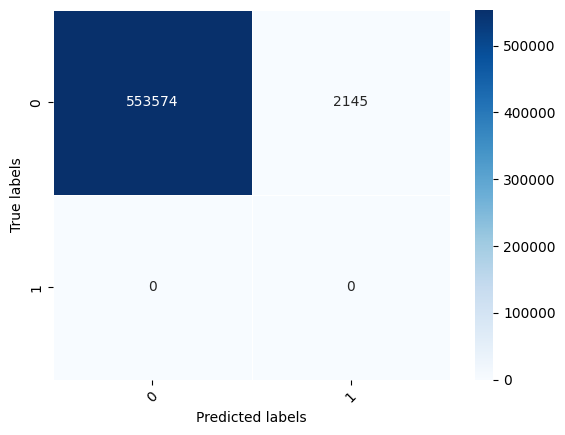

In [42]:
cm = confusion_matrix(predictions_lr, Y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(rotation=45)
plt.show()

# Decision Tree

In [29]:
Tree = DecisionTreeClassifier().fit(features,Y)
Tree

DecisionTreeClassifier()

In [30]:
predictions_dt = Tree.predict(features_test)
predictions_dt[0:5]

array([0., 0., 0., 0., 0.])

In [31]:
predict_proba_dt = Tree.predict_proba(features_test)
predict_proba_dt[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
Tree_Accuracy_Score = metrics.accuracy_score(Y_test, predictions_dt)
Tree_JaccardIndex = jaccard_score(Y_test, predictions_dt, pos_label=1)
Tree_F1_Score = f1_score(Y_test, predictions_dt, average='weighted')
Tree_Log_Loss = log_loss(Y_test, predict_proba_dt)
Tree_report = {'Accuracy_Score': Tree_Accuracy_Score, 'JaccardIndex': Tree_JaccardIndex, 'F1_Score': Tree_F1_Score, "Log_Loss":Tree_Log_Loss}
df_dt = pd.DataFrame(Tree_report, index=['Decision_tree'])
df_dt

,Accuracy_Score,JaccardIndex,F1_Score,Log_Loss
Decision_tree,0.991008,0.200864,0.992922,0.324103


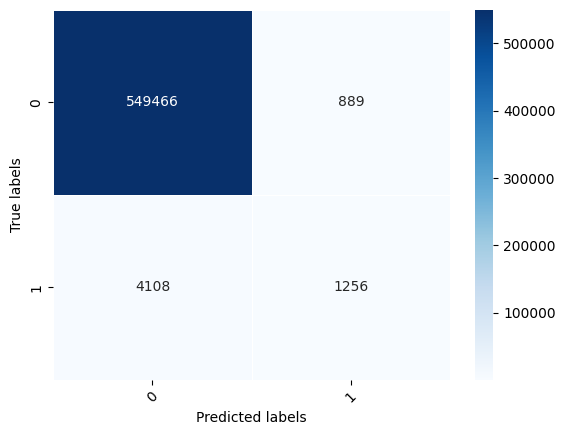

In [43]:
cm = confusion_matrix(predictions_dt, Y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(rotation=45)
plt.show()

## Random Forest

In [33]:
reg = RandomForestRegressor(n_estimators=9, random_state=0)
reg.fit(features, Y)

RandomForestRegressor(n_estimators=9, random_state=0)

In [34]:
predictions_rf = reg.predict(features_test)
predictions_rf[:5]

array([0., 0., 0., 0., 0.])

In [35]:
print('Mean Squared Error(MSE):')
MSE = round(mean_squared_error(Y_test, predictions_rf),4)
print(round(mean_squared_error(Y_test, predictions_rf),4))
print("---------------")
print('Root Mean Square Error(RMSE): ')
RMSE = round(math.sqrt(mean_squared_error(Y_test, predictions_rf)),4)
print(round(math.sqrt(mean_squared_error(Y_test, predictions_rf)),4))
print("---------------")
print('Mean Absolute Error(MAE)')
MAE = round(mean_absolute_error(Y_test, predictions_rf),4)
print(round(mean_absolute_error(Y_test, predictions_rf),4))

Mean Squared Error(MSE):
0.0042
---------------
Root Mean Square Error(RMSE): 
0.0646
---------------
Mean Absolute Error(MAE)
0.0097


In [36]:
rf_report = {"MSE": MSE, "RMSE": RMSE, "MAE":MAE}
df_rf = pd.DataFrame(rf_report, index=["RandomForest"])
df_rf

,MSE,RMSE,MAE
RandomForest,0.0042,0.0646,0.0097


In [37]:
Report = pd.concat([df_lr,df_dt,df_rf])
Report = Report.fillna(0)
round(Report, 4)

,Accuracy_Score,JaccardIndex,F1_Score,Log_Loss,MSE,RMSE,MAE
Logistic regression model,0.9961,0.0000,0.9942,0.0300,0.0000,0.0000,0.0000
Decision_tree,0.9910,0.2009,0.9929,0.3241,0.0000,0.0000,0.0000
RandomForest,0.0000,0.0000,0.0000,0.0000,0.0042,0.0646,0.0097


## "-----------------------------------------"